In [1]:
# from ocelot import *

# from ocelot.gui.accelerator import *

# from rfglinacbte1 import *

# import time

# from rfglinacbte1 import *

# lat = MagneticLattice(lattice_list)

# AX = -13.251547774936
# BX = 48.65814978878985
# AY = -2.1101459419331854
# BY = 13.453044282597473
# DP = .046

# EMITX = 1.2023504614117648e-06
# EMITY = 1.2023504614117648e-06
# energy = 0.0328  # GeV

# tw0 = Twiss()
# tw0.alpha_x = AX
# tw0.beta_x = BX
# tw0.alpha_y = AY
# tw0.beta_y = BY
# tw0.E = energy
# tw0.emit_xn = EMITX
# tw0.emit_yn = EMITY
# tw0.emit_x = EMITX / energy * 0.511e-3
# tw0.emit_y = EMITY / energy * 0.511e-3

# tws = twiss(lat, tw0)

# plot_opt_func(lat, tws, top_plot=["E"], legend=True, font_size=10)
# plt.show()

# # Particle array
# nparticles = 1000
# p_array = ParticleArray(n=nparticles)
# x0, xp0 = 0, 0
# sigx, sigxp = 1.5e-3, 0.5e-3
# p_array.E = energy
# p_array.rparticles[0, :] = sigx * np.random.randn(nparticles) + x0
# p_array.rparticles[1, :] = sigxp * np.random.randn(nparticles) + xp0

# # Track
# p_no = deepcopy(p_array)
# navi = Navigator(lat)
# print("Finding trajectory...")
# start = time.time()
# tws_no, p_no = track(lat, p_no, navi)
# print(f"Tracking time: {time.time()-start:.2f}s")

# x_traj = np.array([t.x for t in tws_no])
# y_traj = np.array([t.y for t in tws_no])
# s_traj = np.array([t.s for t in tws_no])

# plt.plot(s_traj, x_traj * 1e3, label="x [mm]")
# plt.plot(s_traj, y_traj * 1e3, label="y [mm]")
# plt.xlabel("s [m]")
# plt.ylabel("Position [mm]")
# plt.legend()
# plt.show()


initializing ocelot...


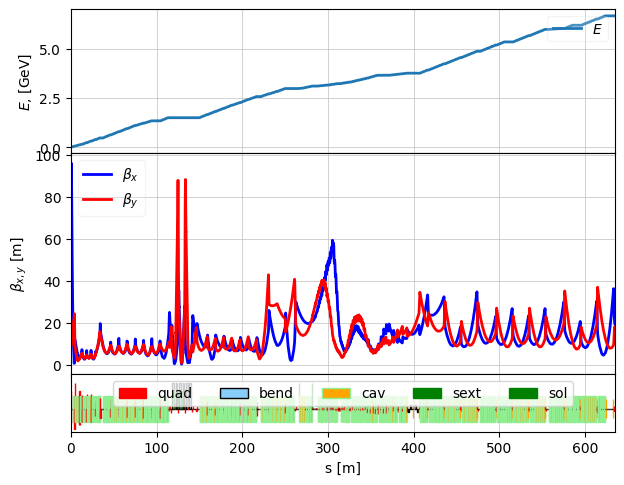

In [2]:
from ocelot import *

from ocelot.gui.accelerator import *

from rfglinacbte1 import *

import time

np.random.seed(60)


def misalign_lattice(lattice_list, sig_x, sig_y):
    for e in lattice_list:
        if e.__class__ == Quadrupole:
            e.dx  = np.random.randn() * sig_x
            e.dy  = np.random.randn() * sig_y

########################
########################


lat = MagneticLattice(lattice_list) 



AX =-13.251547774936   
BX =48.65814978878985  
AY =-2.1101459419331854
BY =13.453044282597473 
DP =.046

EMITX =1.2023504614117648e-06 
EMITY =1.2023504614117648e-06 
energy = 0.0328

tw0 = Twiss()

tw0.alpha_x = AX
tw0.beta_x = BX

tw0.alpha_y = AY
tw0.beta_y = BY

tw0.E = energy

tw0.emit_xn = EMITX
tw0.emit_yn = EMITY
tw0.emit_x = EMITX / energy * 0.511e-3
tw0.emit_y = EMITY / energy * 0.511e-3

tws = twiss(lat,tw0)

plot_opt_func(lat, tws, top_plot = ["E"], legend=True, font_size=10)
plt.show()



######################
########################

misalign_lattice(lattice_list, sig_x = 1.e-3, sig_y = 1.e-3)



In [3]:
import numpy as np

# tracking
nparticles=1000
p_array=ParticleArray(n=nparticles)

# x0, xp0 = 0, 0
# sigx, sigxp = 1.5e-3, 0.5e-3   # convert mm/mrad to meters/radians
# p_array.E = energy # GeV
# p_array.rparticles[0, :] = sigx * np.random.randn(nparticles) + x0
# p_array.rparticles[1, :] = sigxp * np.random.randn(nparticles) + xp0


# tracking
nparticles=10000
p_array=ParticleArray(n=nparticles)

charge = 3.0e-9 # 2 nC
sigma_tau = 1e-3 # mm
sigma_p = 0.01

p_array.E = energy # GeV
p_array.rparticles[0] = np.zeros(nparticles)  #x
p_array.rparticles[1] = np.zeros(nparticles)  #px
p_array.rparticles[2] = np.zeros(nparticles)  #y
p_array.rparticles[3] = np.zeros(nparticles)  #py
# p_array.rparticles[4] = np.random.randn(nparticles) * sigma_tau    #tau
# p_array.rparticles[5] = np.random.randn(nparticles) * sigma_p      #dp
p_array.q_array = np.ones(nparticles) * charge / nparticles


for i in range(nparticles):
    p_array.rparticles[0][i], p_array.rparticles[1][i] = gauss_from_twiss(tw0.emit_x,tw0.beta_x, tw0.alpha_x )
    p_array.rparticles[2][i], p_array.rparticles[3][i] = gauss_from_twiss(tw0.emit_y,tw0.beta_y, tw0.alpha_y )

In [4]:
# Create the Navigator
navi = Navigator(lat)
navi.unit_step = 1  # high-resolution steps


# Track
p_no = deepcopy(p_array)
print("finding trajectory...")
start = time.time()
tws_no, p_no = track(lat, p_no, navi)


x_traj = np.array([t.x for t in tws_no])
y_traj = np.array([t.y for t in tws_no])
s_traj = np.array([t.s for t in tws_no])



finding trajectory...
z = 634.9428243991842 / 634.9428243991842. Applied:  

(-4000000.0, 4000000.0)

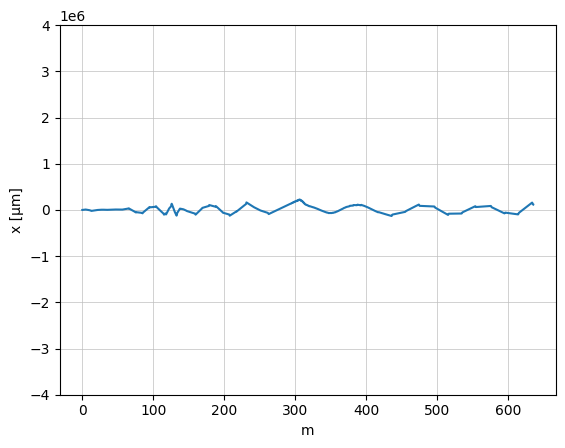

In [5]:
plt.plot(s_traj, x_traj * 1e6)
plt.ylabel("x [μm]")
plt.xlabel(r'm')
plt.ylim(-4e6, 4e6)

In [6]:
# --- Plotting ---

# Single particle trajectories (gray)
for i in range(nparticles):
    plt.plot(s_positions, x_positions[i,:]*1e3, color='black', lw=1, alpha=0.1)

# Mean trajectory (blue)
plt.plot(s_positions, mean_x*1e3, '--', color='blue', lw=3, label=r'$\langle x \rangle$')

# 1-sigma envelope (red)
plt.plot(s_positions, (mean_x+sigma_x)*1e3, '--', color='red', lw=2, label=r'$\pm \sigma_x$')
plt.plot(s_positions, (mean_x-sigma_x)*1e3, '--', color='red', lw=2)

plt.xlabel("s [m]")
plt.ylabel("x [mm]")
plt.title("Beam envelope and mean trajectory")
plt.legend()
plt.grid(True)
# plt.ylim(-4,4)
plt.show()


NameError: name 's_positions' is not defined

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.07 / 0.07. Applied: pplied: 4999999999996. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.04 / 0.04. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.12 / 0.12. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.3296124 / 1.3296124. Applied: 00000000006. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.08382500000000001 / 0.08382500000000001. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 999999999. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.09971 / 0.09971. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.121 / 0.121. Applied: : lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.064 / 0.064. Applied: : lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0575 / 0.0575. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.222 / 0.222. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0814992 / 0.0814992. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.000697 / 0.000697. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.222 / 0.222. Applied: : lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.113712 / 0.113712. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1415535 / 0.1415535. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.085 / 0.085. Applied: : 8759999999946. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.071893 / 0.071893. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1333 / 0.1333. Applied: : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.07 / 0.07. Applied: pplied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.08725 / 0.08725. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.071893 / 0.071893. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0668162 / 0.0668162. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.07 / 0.07. Applied: pplied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.08725 / 0.08725. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.07 / 0.07. Applied: pplied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.2522 / 0.2522. Applied: : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0668162 / 0.0668162. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1333 / 0.1333. Applied: : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: ed: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.000697 / 0.000697. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.085 / 0.085. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.12 / 0.12. Applied: 0.08199999999999835. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.23264999999998737 / 0.23264999999998737. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.24194999999999828 / 0.24194999999999828. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.12 / 0.12. Applied: 0.13980000000000325. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.3221 / 0.3221. Applied: 16219999999981027. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.13940670000014882 / 0.13940670000014882. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1462742 / 0.1462742. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1445884 / 0.1445884. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1791172 / 0.1791172. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0846178 / 0.0846178. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1113122 / 0.1113122. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.156964 / 0.156964. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0558248 / 0.0558248. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.09127 / 0.09127. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.9092 / 1.9092. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0811135 / 0.0811135. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0961135 / 0.0961135. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = -0.000469 / -0.000469. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1912 / 0.1912. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1424029 / 0.1424029. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = -0.00045 / -0.00045. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.14548379999998926 / 0.14548379999998926. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.04353999999992155 / 0.04353999999992155. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.15269 / 1.15269. Applied: 0000000000025. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.23194999999997154 / 0.23194999999997154. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1349999999999758 / 0.1349999999999758. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.04 / 0.04. Applied: 0.46710450000011416. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.12 / 0.12. Applied: 0.14010000000000475. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 999997045. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.036847 / 0.036847. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.00305 / 0.00305. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.085 / 0.085. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0575 / 0.0575. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.00305 / 0.00305. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0911 / 0.0911. Applied: : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.07 / 0.07. Applied: ed: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.2039 / 0.2039. Applied: : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0635586 / 0.0635586. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.07 / 0.07. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.035 / 0.035. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.2039 / 0.2039. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: ed: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.05 / 0.05. Applied: pplied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.236 / 0.236. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0290286 / 0.0290286. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1415535 / 0.1415535. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0479 / 0.0479. Applied: : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.035 / 0.035. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0630486 / 0.0630486. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.10597 / 0.10597. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.035 / 0.035. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.2039 / 0.2039. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.10597 / 0.10597. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.035 / 0.035. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.00305 / 0.00305. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.078 / 0.078. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.2555 / 0.2555. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.106939 / 0.106939. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0515 / 0.0515. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.106939 / 0.106939. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.211 / 0.211. Applied: 581250000000001. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.19 / 0.19. Applied: ed: 45000000000000005. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.162655 / 0.162655. Applied: 00000000003. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.353663 / 0.353663. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.6792 / 0.6792. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.437 / 0.437. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.098296 / 0.098296. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.994418 / 1.994418. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.098296 / 0.098296. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.065 / 0.065. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1807963 / 0.1807963. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0812037 / 0.0812037. Applied: 000000002. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1 / 0.1. Applied: : 5. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.09 / 0.09. Applied: 0.08460185000000003. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.09 / 0.09. Applied: 0.15960185000000005. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1 / 0.1. Applied: 185. Applied: 000000006. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.098296 / 0.098296. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.3343975 / 0.3343975. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: ed: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.14809675 / 0.14809675. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.3343975 / 0.3343975. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.098296 / 0.098296. Applied: ed: 9999999. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.3343975 / 0.3343975. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: ed: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.09914274999999999 / 0.09914274999999999. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0875 / 0.0875. Applied: ed: 6750000000005. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.10975025 / 0.10975025. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.3444025 / 0.3444025. Applied: : 0000002. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.3343975 / 0.3343975. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.12 / 0.12. Applied: 0.24214275000000002. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.3343975 / 0.3343975. Applied: : 999999967. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1737145 / 0.1737145. Applied: 000000002. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.3343975 / 0.3343975. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.056947750000000005 / 0.056947750000000005. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.12314275 / 0.12314275. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.04548099999998559 / 0.04548099999998559. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: pplied: 0001442. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0875 / 0.0875. Applied: 818900000000004. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.272162 / 0.272162. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0875 / 0.0875. Applied: 60164749999999996. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.165025 / 0.165025. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.17880000000000001 / 0.17880000000000001. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.18563775 / 0.18563775. Applied: 999952175. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.232162 / 0.232162. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1737145 / 0.1737145. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.327838 / 0.327838. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.00562375 / 0.00562375. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.18 / 0.18. Applied: 5. Applied: 9999997. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.520962 / 0.520962. Applied: 1750000000004. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0875 / 0.0875. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.327838 / 0.327838. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0875 / 0.0875. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.347055 / 0.347055. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.350236 / 0.350236. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.17880000000000001 / 0.17880000000000001. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.348828 / 0.348828. Applied: 5999999999996. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0875 / 0.0875. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0875 / 0.0875. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.514162 / 0.514162. Applied: 7749999999998. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.06355 / 0.06355. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1261 / 0.1261. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0875 / 0.0875. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: 9489999999999. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.028421 / 0.028421. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.6375 / 0.6375. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.2115 / 0.2115. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.6375 / 0.6375. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0835 / 0.0835. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0915 / 0.0915. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.18 / 0.18. Applied: : : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.10575 / 0.10575. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.6375 / 0.6375. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0835 / 0.0835. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.6375 / 0.6375. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.03925 / 0.03925. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0875 / 0.0875. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0835 / 0.0835. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.637501 / 0.637501. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1115 / 0.1115. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.183697 / 0.183697. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.08725 / 0.08725. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1585 / 0.1585. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1775 / 0.1775. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.235025 / 1.235025. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.04335 / 0.04335. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.183697 / 0.183697. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.2522 / 0.2522. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.32875 / 0.32875. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.822922133194488 / 1.822922133194488. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.05 / 0.05. Applied: lied: 54572496455. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.081 / 0.081. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.035 / 0.035. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1845 / 0.1845. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.10597 / 0.10597. Applied: 009000000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.10597 / 0.10597. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: ed: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.08 / 0.08. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: 009000000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: 60886199999987414. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 9999999. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.05 / 0.05. Applied: : pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.08 / 0.08. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: 886199999987414. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.08999080000000009 / 0.08999080000000009. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 9999999. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.05 / 0.05. Applied: : pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1845 / 0.1845. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.11897 / 0.11897. Applied: 009000000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1319388 / 0.1319388. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.05 / 0.05. Applied: pplied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.305877 / 0.305877. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.1319388 / 0.1319388. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.211 / 0.211. Applied: : lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.005009000000000041 / 0.005009000000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.035 / 0.035. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.07 / 0.07. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.278509 / 0.278509. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.211 / 0.211. Applied: : lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0885 / 0.0885. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.05 / 0.05. Applied: : pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.211 / 0.211. Applied: : lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.035 / 0.035. Applied: pplied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.085 / 0.085. Applied: .055479000000000056. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0575 / 0.0575. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.211 / 0.211. Applied: : lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: : 000000003. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.175 / 0.175. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.211 / 0.211. Applied: : 291200000005724. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.21660130193995 / 0.21660130193995. Applied: 

/Users/andreaaguirre/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


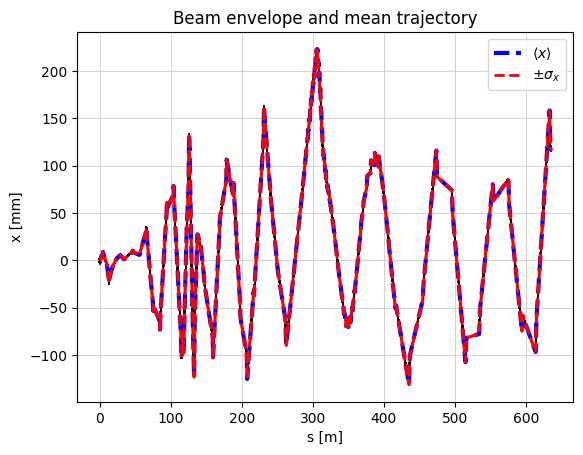

In [7]:
# --- Track step-by-step through the lattice ---
s_positions = []
x_positions = np.zeros((nparticles, len(lat.sequence)+1))
xp_positions = np.zeros((nparticles, len(lat.sequence)+1))

# initial
x_positions[:, 0] = p_array.rparticles[0, :]
xp_positions[:, 0] = p_array.rparticles[1, :]
s_positions.append(0)

p_temp = p_array.copy()

for i, elem in enumerate(lat.sequence):
    _, p_temp = track(MagneticLattice([elem]), p_temp)
    s_positions.append(s_positions[-1] + elem.l)
    x_positions[:, i+1] = p_temp.rparticles[0, :]
    xp_positions[:, i+1] = p_temp.rparticles[1, :]

s_positions = np.array(s_positions)

# --- Compute mean and std over all particles ---
mean_x = np.mean(x_positions, axis=0)
sigma_x = np.std(x_positions, axis=0)

# --- Plotting ---

# Single particle trajectories (gray)
for i in range(nparticles):
    plt.plot(s_positions, x_positions[i,:]*1e3, color='black', lw=1, alpha=0.1)

# Mean trajectory (blue)
plt.plot(s_positions, mean_x*1e3, '--', color='blue', lw=3, label=r'$\langle x \rangle$')

# 1-sigma envelope (red)
plt.plot(s_positions, (mean_x+sigma_x)*1e3, '--', color='red', lw=2, label=r'$\pm \sigma_x$')
plt.plot(s_positions, (mean_x-sigma_x)*1e3, '--', color='red', lw=2)

plt.xlabel("s [m]")
plt.ylabel("x [mm]")
plt.title("Beam envelope and mean trajectory")
plt.legend()
plt.grid(True)
plt.show()